<a href="https://colab.research.google.com/github/bjw6/bjw6.github.io/blob/main/truth_social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/IW

/content/drive/My Drive/IW


In [ ]:
import pandas as pd
import numpy as np
import re
import string

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
truths = pd.read_csv('truths.tsv', usecols= ['like_count', 'retruth_count', 'reply_count', 'text'], sep='\t')

In [ ]:
truths.head()
preprocessed = truths.copy()

In [ ]:
truths.describe()

,like_count,retruth_count,reply_count
count,845060.000000,845060.000000,845060.000000
mean,153.816425,50.535645,10.982393
std,1466.952653,433.928189,110.617915
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,5.000000,0.000000,1.000000
max,268000.000000,51000.000000,37500.000000


In [ ]:
truths.shape

(845060, 4)

In [ ]:
truths['text'][0:25]

0     Q+ BE READY ANONS - PUBLIC AWAKENING COMING - ...
1                             Enough is enough! RETRUTH
2     https://justthenews.com/politics-policy/all-th...
3                       https://t.me/realx22report/6729
4                                        @CeceBloomwood
5     Joe Biden wants this video removed from the in...
6                  <emoji: dart><emoji: 100><emoji: us>
7                       https://t.me/realx22report/6692
8                                #truth #soros #ukraine
9     WHAT A GLORIOUS DAY THAT WILL BE<emoji: heart_...
10    WHEN YOU SEE THESE THINGS HAPPENING..YOU KNOW ...
11    IF  ANYONE HAS NOT GOT THE SPIRIT CHRIST..THEY...
12    GOD DETESTS THE PROUD AND ARROGANT..I BLOCKED ...
13                                                   JS
14    THOSE WHO TRULY ARE BORN AGAIN OF THE SPIRIT W...
15    JESUS ACT OF MERCY ON HIM IS NOT FOR ME TO ARG...
16        This is not @fatlova site..need to move there
17    OUR GOVERNMENT LIED..THEY NEVER REPORTED A

In [ ]:
!pip install contractions

import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [ ]:
url_regex = r"https?://.*"
mention_regex = r'@[\w\-]+'
hashtag_regex = r'#[\w\-]+'
amp_regex = r'&[^ ]*'
exclamation_regex = r'!'
space_pattern = r'\s+'
rt_pattern = r'RT'
period_pattern = r'\.+'
emoji_pattern = r'<.*?>'

def preprocess(text):

    parsed_text = re.sub(emoji_pattern, ' ', str(text))
    parsed_text = contractions.fix(text)
    parsed_text = ' '.join([word for word in parsed_text.split() if word.lower() not in stop_words])
    parsed_text = re.sub(space_pattern, ' ', parsed_text)
    parsed_text = re.sub(url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(exclamation_regex, '', parsed_text)
    parsed_text = re.sub(period_pattern, ' ', parsed_text)
    parsed_text = re.sub(amp_regex, '', parsed_text)
    parsed_text = parsed_text.lower()
    parsed_text = ' '.join([word for word in parsed_text.split() if len(word) > 1 and word not in punctuations])
    return parsed_text

# Assuming 'truths' is your DataFrame and 'text' is the column you want to preprocess
preprocessed['text'] = preprocessed['text'].apply(lambda x: preprocess(x))

In [ ]:
length = truths.shape[0]
perc_liked = np.count_nonzero(truths['like_count'])/length
perc_retruthed = np.count_nonzero(truths['retruth_count'])/length
perc_reply = np.count_nonzero(truths['reply_count'])/length

print(f"num truths: {length}")
print(f"percent liked: {perc_liked}")
print(f"percent retruthed: {perc_retruthed}")
print(f"percent replied to: {perc_reply}")

num truths: 845060
percent liked: 0.554707358057416
percent retruthed: 0.2287778382600052
percent replied to: 0.31417414148107825


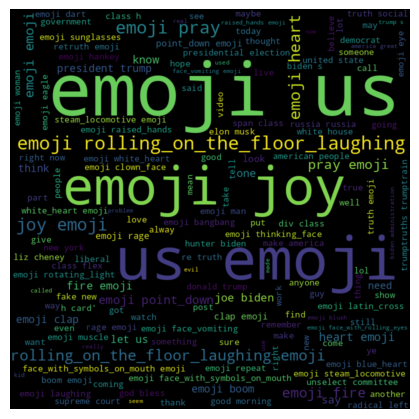

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import files
# https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b
# word cloud all
wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(preprocessed['text'].values))
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [ ]:
# Tokenize
truths['text'] = truths['text'].apply(lambda x: preprocess_string(x))

In [ ]:
truths['text'][0:10]

In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
truths['text'][0:10]

0    Q+ BE READY ANONS - PUBLIC AWAKENING COMING - ...
1                            Enough is enough! RETRUTH
2    https://justthenews.com/politics-policy/all-th...
3                      https://t.me/realx22report/6729
4                                       @CeceBloomwood
5    Joe Biden wants this video removed from the in...
6                 <emoji: dart><emoji: 100><emoji: us>
7                      https://t.me/realx22report/6692
8                               #truth #soros #ukraine
9    WHAT A GLORIOUS DAY THAT WILL BE<emoji: heart_...
Name: text, dtype: object

In [ ]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)

(845060,)